# Finding mRNA versus protein correlation for a single gene

In [1]:
import cptac
import scipy
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import pcprutils as ut
import cptac.pancan as pc

In [2]:
luad = pc.PancanLuad()

/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(


/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/cptac/pancan/washuluad.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = tumor.append(normal)
/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/cptac/pancan/washuluad.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = tumor.append(normal)
/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/cptac/pancan/washuluad.py:136: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_df = tumor.append(normal)


/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(


/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/cptac/pancan/washuluad.py:215: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rna_combined = rna_tumor.append(rna_normal)


In [3]:
def annotate(data, **kws): #Function to annotate the correlation of each plot in the plot
    r, p = scipy.stats.pearsonr(data['Protein Abundance'], data['RNA Abundance'])
    ax = plt.gca()
    ax.text(.05, .8, 'corr= {:.3f}'.format(r),
            transform=ax.transAxes)
    ax.set(xlabel='common xlabel', ylabel='common ylabel')


In [4]:
sns.set_context(rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16, 'xtick.labelsize': 12, 'ytick.labelsize': 12}) 

/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/Users/humbertogiraldez/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


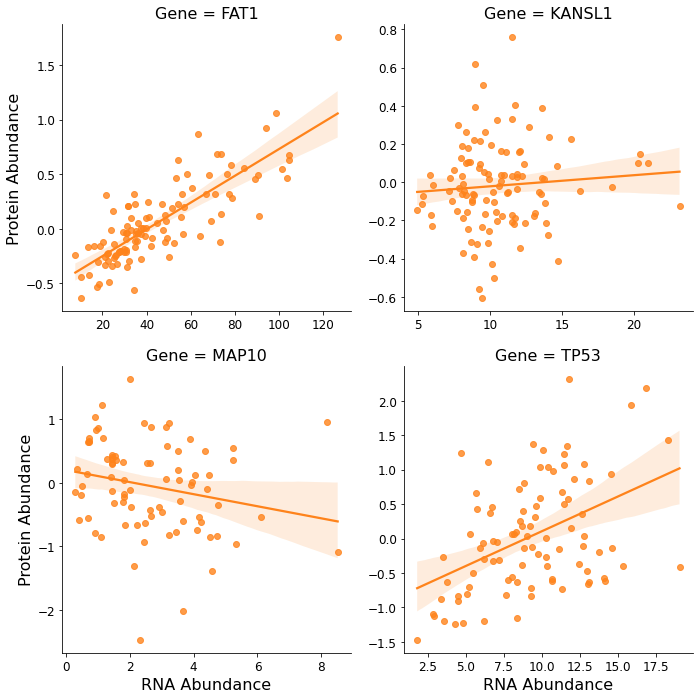

In [5]:
genes = ['TP53','FAT1','KANSL1','MAP10']
df = ut.get_prot_trans_df(luad)
df = df[df['Tissue'] == 'Tumor']
df = df[df.Gene.isin(genes)]
plot = sns.lmplot(y="Proteomics", x="Transcriptomics", sharex= False, sharey = False, col="Gene", data=df, col_wrap=2,line_kws={'color': '#fe831b'}, scatter_kws={'color': '#fe831b'});
axes = plot.axes
plot.set_axis_labels("RNA Abundance", "Protein Abundance")
plot.tight_layout()
plt.savefig('Figures/Figure S1) Single gene correlations', dpi=600)
plt.show()

